## Correlation Analysis


### Goal of this section is to check for  Correlation and Redundancy in the Boston Housing Dataset

In [1]:
install.packages('moments')
install.packages('rpart')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(mlbench)
library(caret)
library(rpart)
library(repr)
library(reshape2)

Loading required package: lattice
Loading required package: ggplot2


In [ ]:
data("BostonHousing")

In [12]:
dim(BostonHousing)

[1] 506  14

### Check for missing data and handle it.


Notice below that we do not have any missing data

In [13]:
BostonHousing[!complete.cases(BostonHousing),]

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


### Prepare data for Sampling

Let's separate features from the target. 

Note that we can include the categorical column chas in the aggregation as chas is a binary values column with 0 or 1 as values. We just need to convert the column's data type from factor to integer, we can perform computations on it like a numeric column.

In [4]:
bostonhousing_features <- BostonHousing[1:13]
bostonhousing_features$chas = as.numeric(as.character(bostonhousing_features$chas))

In [5]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

### Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [6]:
housing_r = data.frame(feature=colnames(bostonhousing_features))
housing_r[1, 'redundancy'] <- calculate_r_2_for_feature(bostonhousing_features,'crim')
housing_r[2, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'zn')
housing_r[3, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'indus')
housing_r[4, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'chas')
housing_r[5, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'nox')
housing_r[6, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'rm')
housing_r[7, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'age')
housing_r[8, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'dis')
housing_r[9, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'tax')
housing_r[10, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'tax')
housing_r[11, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'ptratio')
housing_r[12, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'b')
housing_r[13, 'redundancy'] = calculate_r_2_for_feature(bostonhousing_features,'lstat')
housing_r

feature,redundancy
crim,0.43994072
zn,0.89430125
indus,0.82332757
chas,0.06793653
nox,0.80968692
rm,0.50451851
age,0.52467097
dis,0.76433582
rad,0.91906371
tax,0.95804969


#### The redundancy values represent the predictability of the feature using other features. So higher the redundancy, higher the correlation and higher the dependence of the feature on other features.

So, except chas rm, & b all other features are highly correlated.

Since there is a randomness in the train-test-split, let's take repeated samples and average the redundance and see if it makes a difference.

In [7]:
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [8]:
housing_r[1, 'redundancy'] <- mean_r2_for_feature(bostonhousing_features,'crim')
housing_r[2, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'zn')
housing_r[3, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'indus')
housing_r[4, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'chas')
housing_r[5, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'nox')
housing_r[6, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'rm')
housing_r[7, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'age')
housing_r[8, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'dis')
housing_r[9, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'tax')
housing_r[10, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'tax')
housing_r[11, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'ptratio')
housing_r[12, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'b')
housing_r[13, 'redundancy'] = mean_r2_for_feature(bostonhousing_features,'lstat')
housing_r

feature,redundancy
crim,0.32437819
zn,0.79629633
indus,0.86318074
chas,-0.06771692
nox,0.83865726
rm,0.35123926
age,0.67840301
dis,0.80256750
rad,0.90175326
tax,0.89756673


#### With repeated samples we can see that,

- chas, rm & b still show little or no correlation.

- crim shows negligent correlation.


#### Let's view a Pair Plot of all the features and  examine the correlartions between the features.

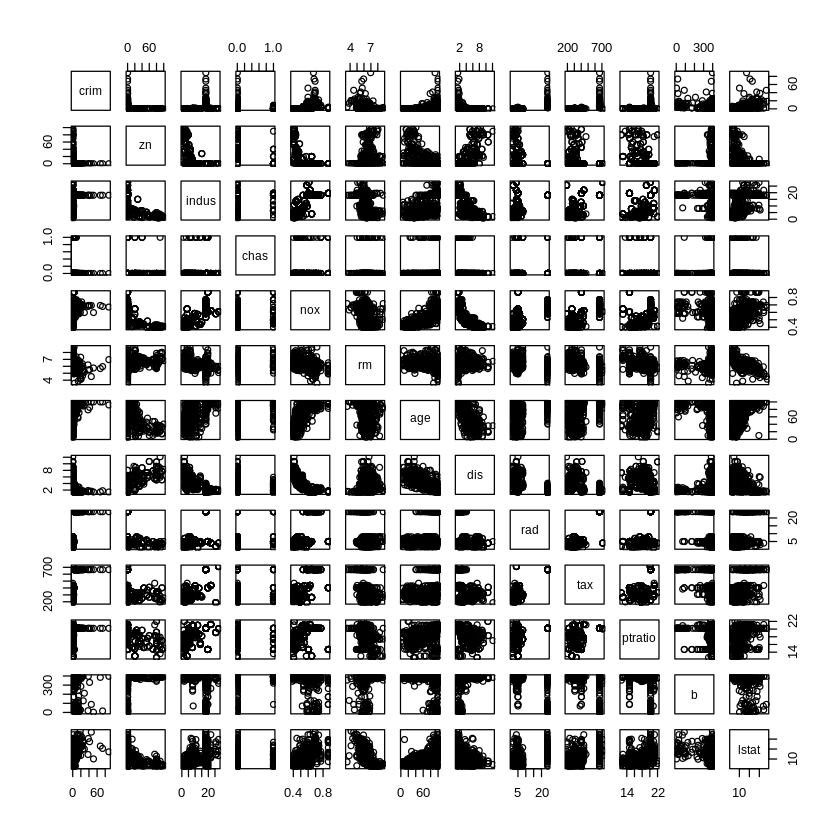

In [9]:
pairs(bostonhousing_features)
options(repr.plot.width=7, repr.plot.height=7)

#### Observations: From the above Pairs Plot it seems that,

- There is a positive correlation between
    - crim & age
    - zn & dis
    - indus & age
    - indus & ptratio
    - nox & age
    - nox & lstat
    - age & lstat
- There is a negative correlation between
    - crim & dis
    - zen & nox
    - zen & age
    - indus & dis
    - nox & dis
    - rm & lsat
    - dis & lstat
- There seems to be not much correlation w.r.t
    - b
    - chas
    - tax
    s

In [10]:
cor_matrix = cor(bostonhousing_features)
cor_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934


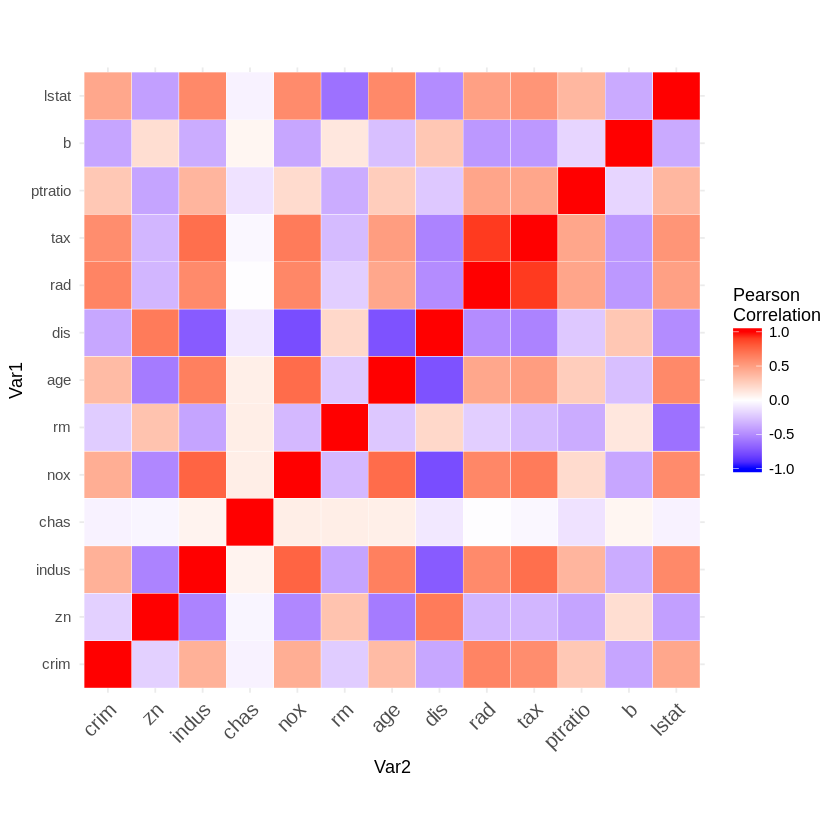

In [11]:
library(ggplot2)
ggplot(melt(cor_matrix), aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

#### Observations: Analysing the Pearsons coefficient mapped on a heatmap...:

- The bright red boxes represent highly positively correated features.
    - tax & rad are highly correlated
- Other positively correlated features are
    - lstat &
        - indus
        - nox
        - age
    - tax &
        - crim
        - indus
        - nox
    - rad &
        - crim
        - indus
        - nox
    - dis &
        - zn
    - age &
        - indus
        - nox
    - nox &
        - index
- chas show no correlation with other features.
- The following features are highly negatively correlated
    - lstat & rm
    - dis &
        - indus
        - nox
        - age
